In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the weather dataset

credit_data= pd.read_csv(r"C:\Users\sindu\OneDrive\Documents\summer-1\train.csv", header=0)

# Loading the Validation Dataset

credit_validation=pd.read_csv(r"C:\Users\sindu\OneDrive\Documents\summer-1\test.csv",header=0)

# Copy to back-up file

credit_backup = credit_data.copy()
credit_validation_backup=credit_validation.copy()

# Display first 5 records of train dataset

credit_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
# Display the first five records of validation dataset

credit_validation.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [4]:
# Removing "_" from the attribute Annual_Income in the train and test dataset

credit_data['Annual_Income']=credit_data['Annual_Income'].str.replace("_","")

credit_validation['Annual_Income']=credit_validation['Annual_Income'].str.replace("_","")


In [5]:
# Removing "_" from the attribute Age in the train and test dataset

credit_data['Age']=credit_data['Age'].str.replace("_","")

credit_validation['Age']=credit_validation['Age'].str.replace("_","")

In [6]:
credit_data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1728
SSN                          12501
Occupation                      16
Annual_Income                13487
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
credit_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [9]:
# Converting the Attribute "Annal_Income" from "Object" to "Float"

credit_data['Annual_Income'].astype(float)

credit_validation['Annual_Income'].astype(float)

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        34847.84
           ...   
49995    20002.88
49996    39628.99
49997    39628.99
49998    39628.99
49999    39628.99
Name: Annual_Income, Length: 50000, dtype: float64

In [10]:
# functions for better visualization of the posterior plots

def resizeplot():
    plt.figure(figsize=(12,6))
    
# function for correlations plots

def resizecorr():
    plt.figure(figsize=(15,7))

<AxesSubplot:>

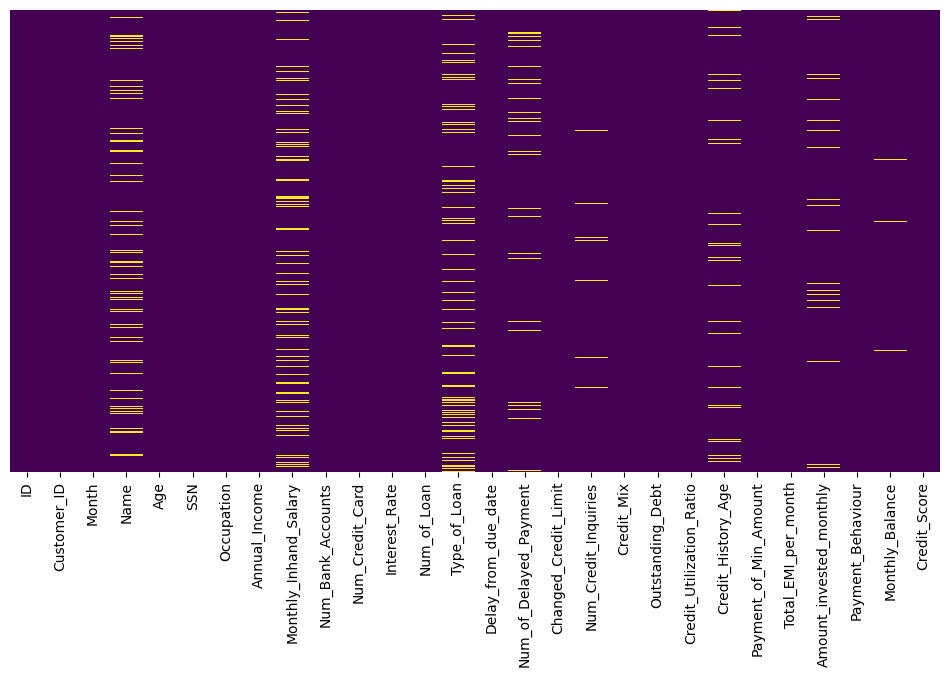

In [11]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(credit_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

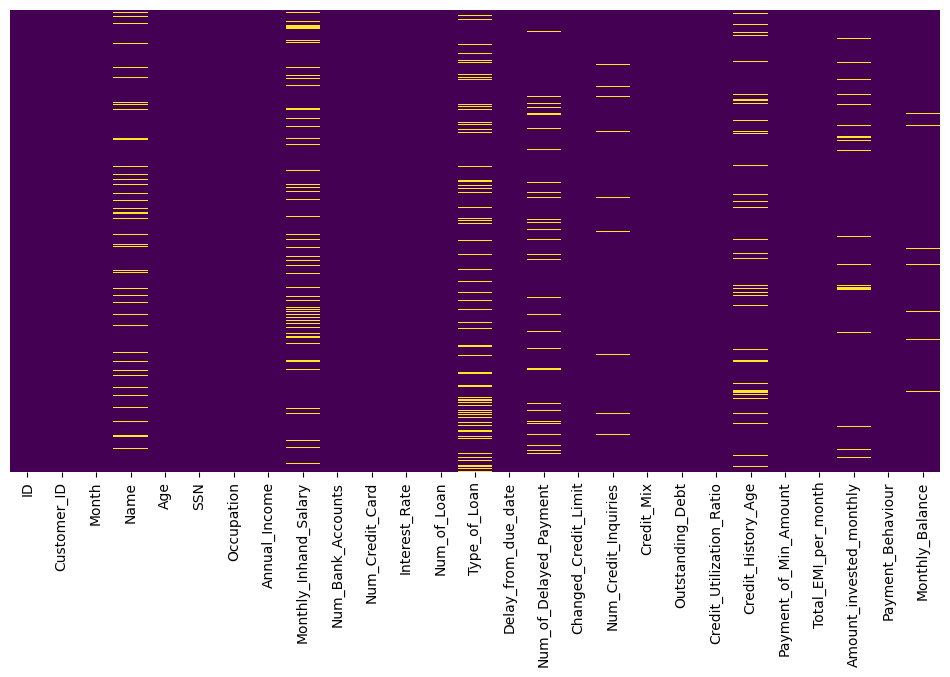

In [12]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(credit_validation.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# Replacing NULL values from validation dataset

# Use SimpleImputer to address missing values

# KNN imputer is used to address the missing values of a discrete but not categorical

# Simple imputer addresses both discrete and categorical variable null values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

credit_data['Monthly_Inhand_Salary'] = imputer_str.fit_transform(credit_data[['Monthly_Inhand_Salary']])
credit_data['Num_of_Delayed_Payment'] = imputer_str.fit_transform(credit_data[['Num_of_Delayed_Payment']])
credit_data['Num_Credit_Inquiries'] = imputer_str.fit_transform(credit_data[['Num_Credit_Inquiries']])
credit_data['Credit_History_Age'] = imputer_str.fit_transform(credit_data[['Credit_History_Age']])
credit_data['Amount_invested_monthly'] = imputer_str.fit_transform(credit_data[['Amount_invested_monthly']])
credit_data['Monthly_Balance'] = imputer_str.fit_transform(credit_data[['Monthly_Balance']])
credit_data['Type_of_Loan'] = imputer_str.fit_transform(credit_data[['Type_of_Loan']])
credit_data['Name'] = imputer_str.fit_transform(credit_data[['Name']])


In [14]:
# Replacing NULL values from validation dataset

# Use SimpleImputer to address missing values

# KNN imputer is used to address the missing values of a discrete but not categorical

# Simple imputer addresses both discrete and categorical variable null values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

credit_validation['Monthly_Inhand_Salary'] = imputer_str.fit_transform(credit_validation[['Monthly_Inhand_Salary']])
credit_validation['Num_of_Delayed_Payment'] = imputer_str.fit_transform(credit_validation[['Num_of_Delayed_Payment']])
credit_validation['Num_Credit_Inquiries'] = imputer_str.fit_transform(credit_validation[['Num_Credit_Inquiries']])
credit_validation['Credit_History_Age'] = imputer_str.fit_transform(credit_validation[['Credit_History_Age']])
credit_validation['Amount_invested_monthly'] = imputer_str.fit_transform(credit_validation[['Amount_invested_monthly']])
credit_validation['Monthly_Balance'] = imputer_str.fit_transform(credit_validation[['Monthly_Balance']])
credit_validation['Type_of_Loan'] = imputer_str.fit_transform(credit_validation[['Type_of_Loan']])
credit_validation['Name'] = imputer_str.fit_transform(credit_validation[['Name']])


<AxesSubplot:>

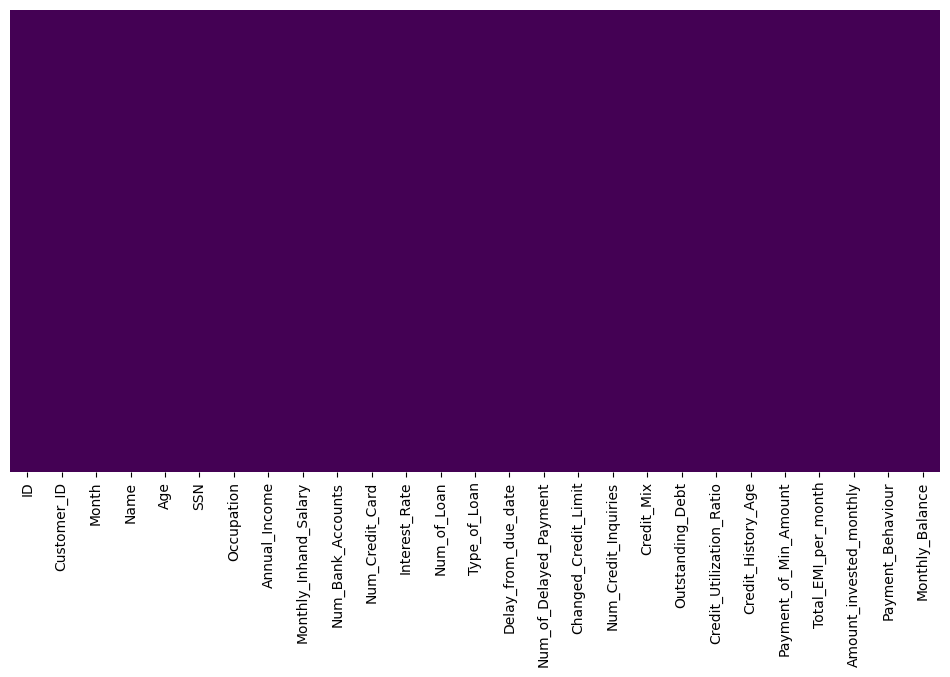

In [15]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(credit_validation.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
# Check again for the null values in train dataset

credit_data.isnull().sum()


ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [17]:
# check again for null values in the validation dataset

credit_validation.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

<AxesSubplot:>

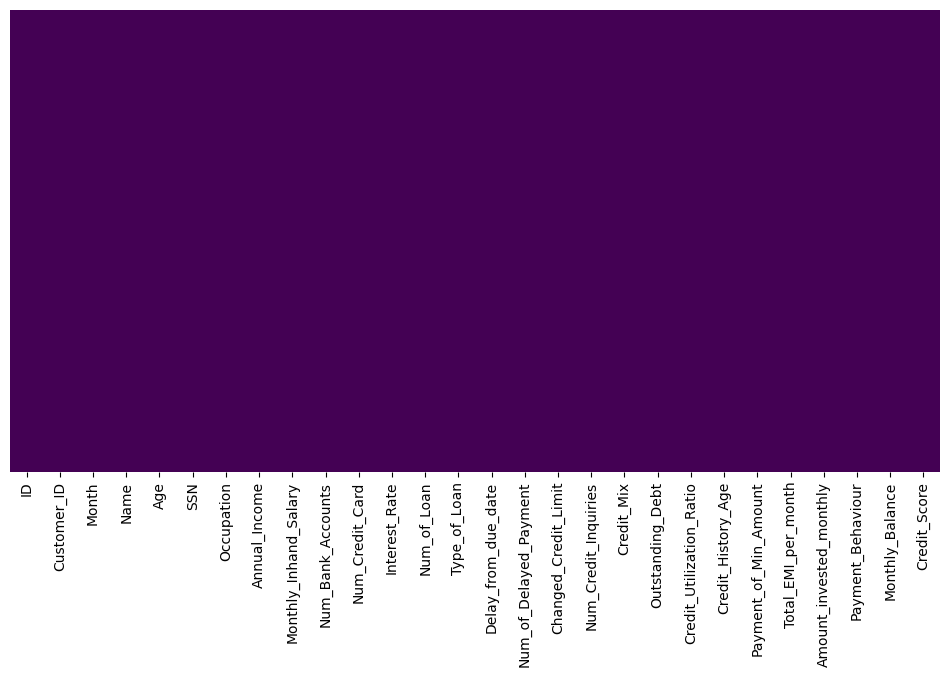

In [18]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(credit_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
# check whether there are duplicates in the train data

credit_data.duplicated().any()

False

In [20]:
# check whether there are duplicates in the test data

credit_validation.duplicated().any()

False

In [21]:
# Removing "_" from the attribute Num_of_Loan in the train and test dataset


credit_data['Num_of_Loan']=credit_data['Num_of_Loan'].str.replace("_","")

credit_validation['Num_of_Loan']=credit_validation['Num_of_Loan'].str.replace("_","")

In [22]:
# Converting the Attribute "Num_of_loan" from "Object" to "Int"

credit_data['Num_of_Loan'].astype(int)

credit_validation['Num_of_Loan'].astype(int)


0        4
1        4
2        4
3        4
4        1
        ..
49995    5
49996    2
49997    2
49998    2
49999    2
Name: Num_of_Loan, Length: 50000, dtype: int32

In [23]:
# Converting the Attribute "Num_of_loan" from "Object" to "Int"

credit_data['Age'].astype(int)

credit_validation['Age'].astype(int)

0          23
1          24
2          24
3          24
4          28
         ... 
49995    4975
49996      25
49997      25
49998      25
49999      25
Name: Age, Length: 50000, dtype: int32

In [24]:
# Removing "_" from the attribute Num_of_Delayed_Payment in the train and test dataset


credit_data['Num_of_Delayed_Payment']=credit_data['Num_of_Delayed_Payment'].str.replace("_","")

credit_validation['Num_of_Delayed_Payment']=credit_validation['Num_of_Delayed_Payment'].str.replace("_","")

In [25]:
# Converting the Attribute "Num_of_Delayed_Payment" from "Object" to "Int"


credit_data['Num_of_Delayed_Payment'].astype(int)

credit_validation['Num_of_Delayed_Payment'].astype(int)

0         7
1         9
2         4
3         5
4         1
         ..
49995    25
49996    19
49997     5
49998     6
49999     5
Name: Num_of_Delayed_Payment, Length: 50000, dtype: int32

In [26]:
# Replacing "_" with "0" from the attribute Changed_Credit_Limit in the train and test dataset


credit_data['Changed_Credit_Limit']=credit_data['Changed_Credit_Limit'].str.replace("_","0")

credit_validation['Changed_Credit_Limit']=credit_validation['Changed_Credit_Limit'].str.replace("_","0")

In [27]:
# Converting the Attribute "Changed_Credit_Limit" from "Object" to "Float"


credit_data['Changed_Credit_Limit'].astype(float)

credit_validation['Changed_Credit_Limit'].astype(float)

0        11.27
1        13.27
2        12.27
3        11.27
4         5.42
         ...  
49995    18.31
49996    11.50
49997    13.50
49998    11.50
49999    11.50
Name: Changed_Credit_Limit, Length: 50000, dtype: float64

In [28]:
# Removing "_" from the attribute Outstanding_Debt in the train and test dataset


credit_data['Outstanding_Debt']=credit_data['Outstanding_Debt'].str.replace("_","")

credit_validation['Outstanding_Debt']=credit_validation['Outstanding_Debt'].str.replace("_","")

In [29]:
# Converting the Attribute "Outstanding_Debt" from "Object" to "Float"


credit_data['Outstanding_Debt'].astype(float)

credit_validation['Outstanding_Debt'].astype(float)

0         809.98
1         809.98
2         809.98
3         809.98
4         605.03
          ...   
49995    3571.70
49996     502.38
49997     502.38
49998     502.38
49999     502.38
Name: Outstanding_Debt, Length: 50000, dtype: float64

In [30]:
# label encoder  to handle categorical data from the train dataset

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
credit_data['Credit_Mix']=l.fit_transform(credit_data[['Credit_Mix']])
credit_data['Payment_of_Min_Amount']=l.fit_transform(credit_data[['Payment_of_Min_Amount']])
credit_data['Payment_Behaviour']=l.fit_transform(credit_data[['Payment_Behaviour']])
credit_data['Credit_Score']=l.fit_transform(credit_data[['Credit_Score']])

In [31]:
# label encoder  to handle categorical data from the train dataset

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
credit_validation['Credit_Mix']=l.fit_transform(credit_validation[['Credit_Mix']])
credit_validation['Payment_of_Min_Amount']=l.fit_transform(credit_validation[['Payment_of_Min_Amount']])
credit_validation['Payment_Behaviour']=l.fit_transform(credit_validation[['Payment_Behaviour']])


In [32]:
# Removing "_" from the attribute Amount_invested_monthly in the train and test dataset

credit_data['Amount_invested_monthly']=credit_data['Amount_invested_monthly'].str.replace("_","")

credit_validation['Amount_invested_monthly']=credit_validation['Amount_invested_monthly'].str.replace("_","")

In [33]:
# Converting the Attribute "Amount_invested_monthly" from "Object" to "Float"

credit_data['Amount_invested_monthly'].astype(float)

credit_validation['Amount_invested_monthly'].astype(float)


0          236.642682
1           21.465380
2          148.233938
3           39.082511
4           39.684018
             ...     
49995      146.486325
49996      181.442999
49997    10000.000000
49998       97.598580
49999      220.457878
Name: Amount_invested_monthly, Length: 50000, dtype: float64

In [34]:
# Removing "_" from the attribute Monthly_Balance in the train and test dataset

credit_data['Monthly_Balance']=credit_data['Monthly_Balance'].str.replace("_","")

credit_validation['Monthly_Balance']=credit_validation['Monthly_Balance'].str.replace("_","")

In [35]:
# Converting the Attribute "Monthly_Balance" from "Object" to "Float"

credit_data['Monthly_Balance'].astype(float)

credit_validation['Monthly_Balance'].astype(float)

0        186.266702
1        361.444004
2        264.675446
3        343.826873
4        485.298434
            ...    
49995    275.539570
49996    409.394562
49997    349.726332
49998    463.238981
49999    360.379683
Name: Monthly_Balance, Length: 50000, dtype: float64

In [36]:
from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

credit_data['Monthly_Balance'] = imputer_str.fit_transform(credit_data[['Monthly_Balance']])

credit_validation['Monthly_Balance'] = imputer_str.fit_transform(credit_validation[['Monthly_Balance']])

In [37]:
# Delete the column "ID" in train dataset

del credit_data['ID']

In [38]:
# Delete the column "ID" in validation dataset

del credit_validation['ID']

In [39]:
# Delete the columns "Customer_ID","SSN" in train dataset

del credit_data['Customer_ID'],credit_data['SSN']

In [40]:
# Delete the columns "Customer_ID","SSN" in validation dataset


del credit_validation['Customer_ID'],credit_validation['SSN']

In [41]:
# Delete the columns "Credit_History_Age","Month" in train dataset

del credit_data['Credit_History_Age'],credit_data['Month']

In [42]:
# Delete the columns "Credit_History_Age","Month" in validation dataset

del credit_validation['Credit_History_Age'],credit_validation['Month']

In [43]:
# Delete the column "Type_of_Loan" in train dataset

del credit_data['Type_of_Loan']

In [44]:
# Delete the column "Type_of_Loan" in validation dataset

del credit_validation['Type_of_Loan']

In [45]:
# Delete the columns "Name","Occupation" in train dataset

del credit_data['Name'],credit_data['Occupation']

In [46]:
# Delete the columns "Name","Occupation" in validation dataset

del credit_validation['Name'],credit_validation['Occupation']

In [47]:
# TRAIN DATA

# count the target or dependent variable by '0' & '1' and their proportion
# (>=10):1 the the data is inbalance data

credit_score_count=credit_data.Credit_Score.value_counts()
print("class 0",credit_score_count[0])
print("class 1",credit_score_count[1])
print("proportion:",round(credit_score_count[0]/credit_score_count[1],2),": 1")
print("Total bank records :",len(credit_data))

class 0 17828
class 1 28998
proportion: 0.61 : 1
Total bank records : 100000


In [48]:
# identifying independent and target variable

IndepVar=[]
for col in credit_data.columns:
    if col != 'Credit_Score':
        IndepVar.append(col)
TarVar='Credit_Score'
x=credit_data[IndepVar]
y=credit_data[TarVar]

In [49]:
# Display the independent variable dataset

x.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,3,809.98,26.822620,1,49.574949,80.41529543900253,3,312.49408867943663
1,23,19114.12,2295.058333,3,4,3,4,-1,19,11.27,4.0,1,809.98,31.944960,1,49.574949,118.28022162236736,4,284.62916249607184
2,-500,19114.12,2295.058333,3,4,3,4,3,7,0,4.0,1,809.98,28.609352,1,49.574949,81.699521264648,5,331.2098628537912
3,23,19114.12,2295.058333,3,4,3,4,5,4,6.27,4.0,1,809.98,31.377862,1,49.574949,199.4580743910713,6,223.45130972736786
4,23,19114.12,1824.843333,3,4,3,4,6,19,11.27,4.0,1,809.98,24.797347,1,49.574949,41.420153086217326,2,341.48923103222177


In [50]:
# Display the target variable dataset

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Credit_Score, dtype: int32

In [51]:
# statistical description of the dataset

credit_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Score
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3909.265990,17.091280,22.47443,72.466040,21.068780,27.287480,1.578800,32.285173,1.403190,1403.118217,3.469040,1.353460
std,3012.500830,117.404834,129.05741,466.422621,14.860104,191.298349,1.013647,5.116875,0.693378,8306.041270,2.035471,0.764913
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,1792.084167,3.000000,4.00000,8.000000,10.000000,3.000000,1.000000,28.052567,1.000000,30.306660,2.000000,1.000000
50%,2623.714167,6.000000,5.00000,13.000000,18.000000,5.000000,2.000000,32.305784,2.000000,69.249473,3.000000,2.000000
75%,5371.525000,7.000000,7.00000,20.000000,28.000000,9.000000,2.000000,36.496663,2.000000,161.224249,6.000000,2.000000
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,3.000000,50.000000,2.000000,82331.000000,6.000000,2.000000


In [52]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Display the shape for train & test datax_train.shape,x_test.shape,y_train.shape,y_test.shape

((70000, 19), (30000, 19), (70000,), (30000,))

In [53]:
# Display the columns in the train dataset

credit_data.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [54]:
# import the MinMaxScalar from sklearn

from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0 , 1))

# fit_transform(). It will calculate the mean(μ)and standard deviation(σ) of the feature
#F at a time it will transform the data points of the feature F.
#x_train[cols2]=mmscaler.fit_transform(x_train[cols2])
x_train=mmscaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)

#x_test[cols2]=mmscaler.fit_transform(x_test[cols2])
x_test=mmscaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [55]:
# Display the first five records of the y_train

y_train.head()

42865    2
91446    1
66374    1
79106    0
13404    2
Name: Credit_Score, dtype: int32

In [56]:
# Display the first five records of the x_test

x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.057311,0.002339,0.133980,0.005574,0.005340,0.003283,0.068546,0.625000,0.004783,0.190520,0.003865,0.000000,0.815030,0.419323,1.0,0.003461,0.018248,0.333333,1.0
1,0.057311,0.001576,0.209622,0.006132,0.004005,0.005529,0.067265,0.277778,0.004783,0.689600,0.002319,0.000000,0.682075,0.652518,1.0,0.001872,0.039473,1.000000,1.0
2,0.058945,0.000882,0.133980,0.003344,0.003338,0.001037,0.064702,0.416667,0.000911,0.373447,0.001160,0.333333,0.167997,0.559738,0.5,0.000180,0.002187,0.166667,1.0
3,0.059926,0.003769,0.529789,0.001115,0.004673,0.000346,0.000000,0.208333,0.000228,0.165670,0.002706,0.333333,0.049743,0.509465,0.0,0.000000,0.014018,0.333333,1.0
4,0.058509,0.003409,0.133980,0.001672,0.004673,0.001900,0.066624,0.208333,0.001366,0.357800,0.001160,0.333333,0.254694,0.194215,0.5,0.002942,0.020366,0.333333,1.0


<AxesSubplot:xlabel='Credit_Score'>

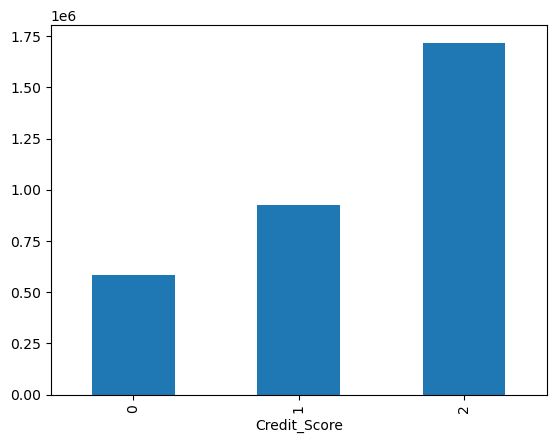

In [71]:
# Bar plot among "Credit_Score" and "Credit_utilisation_Ratio"

credit_data.groupby("Credit_Score")["Credit_Utilization_Ratio"].sum().plot.bar()

<AxesSubplot:xlabel='Credit_Score'>

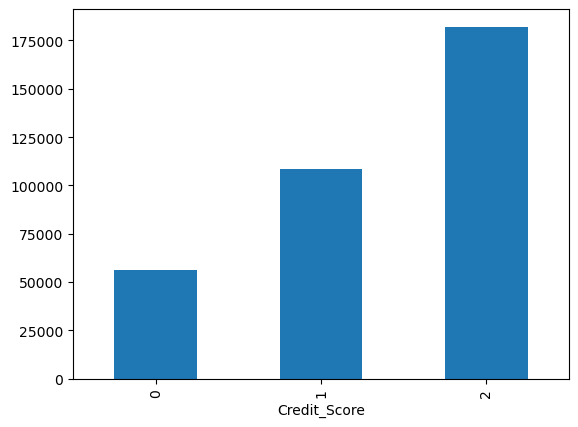

In [72]:
# Bar plot among "Credit_Score" and "Payment_Behaviour"

credit_data.groupby("Credit_Score")["Payment_Behaviour"].sum().plot.bar()

In [ ]:
# Pie chart among "Credit_Score" and "Total_EMI_per_month"

credit_data.groupby("Credit_Score")["Total_EMI_per_month"].sum().plot.pie(autopct="%1.0f%%")

In [57]:
# load the result dataset

EMResults=pd.read_csv(r"C:\Users\sindu\OneDrive\Documents\summer-1\EMResults.csv",header=0)

# display first fve records

EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Multi-Label Classification Analysis

[[ 1768   349  1411]
 [   73  3659  1914]
 [ 3477  4795 12554]]
Print Class: 0
TP=1768, FN=1760, TN=22922, FP=3550
Accuracy: 0.823
Precision: 0.332
Sensitivity: 0.501
F1-Score: 0.4
Specificity: 0.866
Balanced Accuracy: 0.684
MCC: 0.31

Print Class: 1
TP=3659, FN=1987, TN=19210, FP=5144
Accuracy: 0.762
Precision: 0.416
Sensitivity: 0.648
F1-Score: 0.506
Specificity: 0.789
Balanced Accuracy: 0.718
MCC: 0.375

Print Class: 2
TP=12554, FN=8272, TN=5849, FP=3325
Accuracy: 0.613
Precision: 0.791
Sensitivity: 0.603
F1-Score: 0.684
Specificity: 0.638
Balanced Accuracy: 0.62
MCC: 0.222

Overall Performance Prediction:
Accuracy: 73.2667%
Precision: 51.3%
Recall or Sensitivity: 58.4%
F1-Score: 0.53
Specificity or True Nagative Rate: 76.4333%
Balanced Accuracy: 67.4%

MCC: 0.3023

roc_auc_score: 0.759


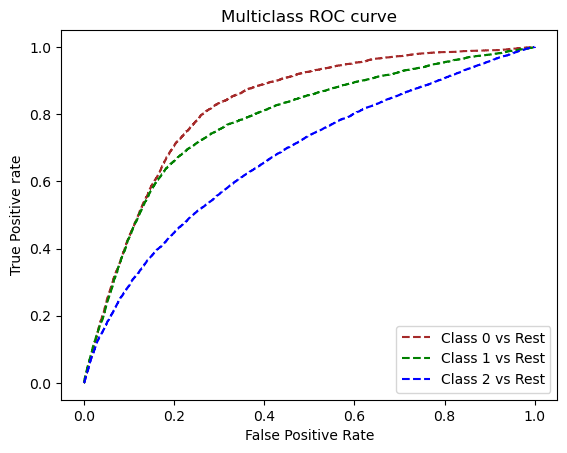

In [58]:

#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

CreditLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with training data

CreditLR = CreditLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = CreditLR.predict(x_test)
y_pred_prob = CreditLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
#plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
#plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
#plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
#plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
#plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
#plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))


new_row = {'Model Name' : CreditLR,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',average='weighted'),
               'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------------------------------------------------

[[ 2974   350  2065]
 [  392  5633  2768]
 [ 1952  2820 11046]]
Print Class: 0
TP=2974, FN=2415, TN=22267, FP=2344
Accuracy: 0.841
Precision: 0.559
Sensitivity: 0.552
F1-Score: 0.556
Specificity: 0.905
Balanced Accuracy: 0.728
MCC: 0.459

Print Class: 1
TP=5633, FN=3160, TN=18037, FP=3170
Accuracy: 0.789
Precision: 0.64
Sensitivity: 0.641
F1-Score: 0.64
Specificity: 0.851
Balanced Accuracy: 0.746
MCC: 0.491

Print Class: 2
TP=11046, FN=4772, TN=9349, FP=4833
Accuracy: 0.68
Precision: 0.696
Sensitivity: 0.698
F1-Score: 0.697
Specificity: 0.659
Balanced Accuracy: 0.678
MCC: 0.358

Overall Performance Prediction:
Accuracy: 77.0%
Precision: 63.1667%
Recall or Sensitivity: 63.0333%
F1-Score: 0.631
Specificity or True Nagative Rate: 80.5%
Balanced Accuracy: 71.7333%

MCC: 0.436

roc_auc_score: 0.717


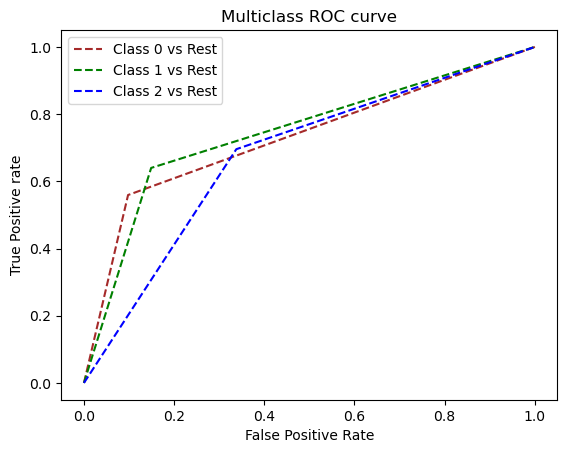

In [59]:
#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Decision Tree Classification' model with random sampling

from sklearn.tree import DecisionTreeClassifier

# Create an object for model

CreditDT= DecisionTreeClassifier()

# Train the model with training data

CreditDT = CreditDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = CreditDT.predict(x_test)
y_pred_prob = CreditDT.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
#plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
#plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
#plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
#plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
#plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
#plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))


new_row = {'Model Name' : CreditDT,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',average='weighted'),
               'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------------------------------------------------

[[ 3595   532  1819]
 [   51  6179  1993]
 [ 1672  2092 12067]]
Print Class: 0
TP=3595, FN=2351, TN=22331, FP=1723
Accuracy: 0.864
Precision: 0.676
Sensitivity: 0.605
F1-Score: 0.638
Specificity: 0.928
Balanced Accuracy: 0.766
MCC: 0.556

Print Class: 1
TP=6179, FN=2044, TN=19153, FP=2624
Accuracy: 0.844
Precision: 0.702
Sensitivity: 0.751
F1-Score: 0.726
Specificity: 0.88
Balanced Accuracy: 0.816
MCC: 0.618

Print Class: 2
TP=12067, FN=3764, TN=10357, FP=3812
Accuracy: 0.747
Precision: 0.76
Sensitivity: 0.762
F1-Score: 0.761
Specificity: 0.731
Balanced Accuracy: 0.746
MCC: 0.493

Overall Performance Prediction:
Accuracy: 81.8333%
Precision: 71.2667%
Recall or Sensitivity: 70.6%
F1-Score: 0.7083
Specificity or True Nagative Rate: 84.6333%
Balanced Accuracy: 77.6%

MCC: 0.5557

roc_auc_score: 0.868


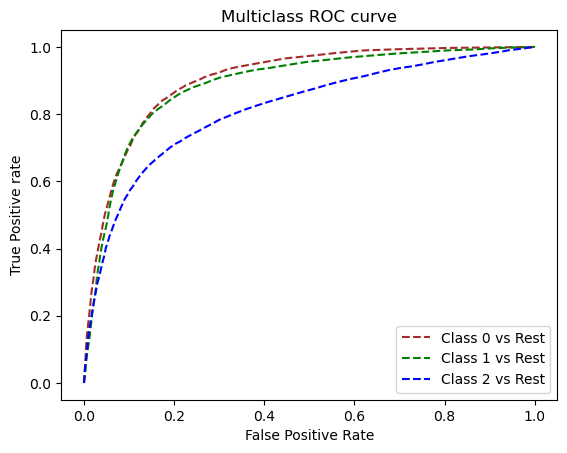

In [60]:
#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Extra Trees Classification' model with random sampling

from sklearn.ensemble import ExtraTreesClassifier

# Create an object for model

CreditET= ExtraTreesClassifier()

# Train the model with training data

CreditET = CreditET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = CreditET.predict(x_test)
y_pred_prob = CreditET.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
#plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
#plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
#plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
#plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
#plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
#plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
new_row = {'Model Name' : CreditET,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',average='weighted'),
               'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)

[[ 3667   279  1373]
 [   49  6690  1939]
 [ 1602  1834 12567]]
Print Class: 0
TP=3667, FN=1652, TN=23030, FP=1651
Accuracy: 0.89
Precision: 0.69
Sensitivity: 0.689
F1-Score: 0.689
Specificity: 0.933
Balanced Accuracy: 0.811
MCC: 0.623

Print Class: 1
TP=6690, FN=1988, TN=19209, FP=2113
Accuracy: 0.863
Precision: 0.76
Sensitivity: 0.771
F1-Score: 0.765
Specificity: 0.901
Balanced Accuracy: 0.836
MCC: 0.669

Print Class: 2
TP=12567, FN=3436, TN=10685, FP=3312
Accuracy: 0.775
Precision: 0.791
Sensitivity: 0.785
F1-Score: 0.788
Specificity: 0.763
Balanced Accuracy: 0.774
MCC: 0.548

Overall Performance Prediction:
Accuracy: 84.2667%
Precision: 74.7%
Recall or Sensitivity: 74.8333%
F1-Score: 0.7473
Specificity or True Nagative Rate: 86.5667%
Balanced Accuracy: 80.7%

MCC: 0.6133

roc_auc_score: 0.892


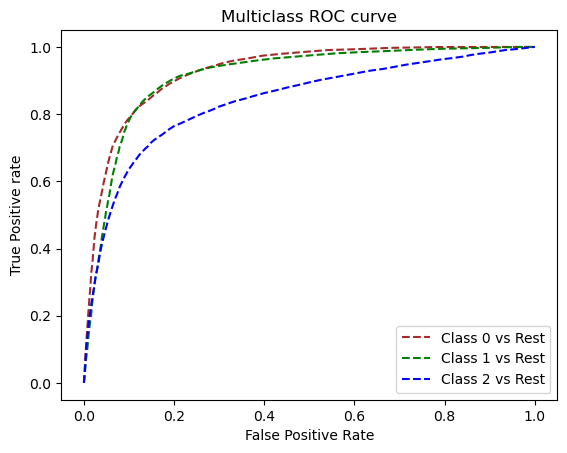

In [61]:
#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Random Forest Classification' model with random sampling

from sklearn.ensemble import RandomForestClassifier

# Create an object for model

CreditRF= RandomForestClassifier()

# Train the model with training data

CreditRF = CreditRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = CreditRF.predict(x_test)
y_pred_prob = CreditRF.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
#plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
#plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
#plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
#plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
#plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
#plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
new_row = {'Model Name' : CreditRF,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',average='weighted'),
               'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)

[[ 2953   907  2360]
 [  359  4949  2642]
 [ 2006  2947 10877]]
Print Class: 0
TP=2953, FN=3267, TN=21415, FP=2365
Accuracy: 0.812
Precision: 0.555
Sensitivity: 0.475
F1-Score: 0.512
Specificity: 0.901
Balanced Accuracy: 0.688
MCC: 0.398

Print Class: 1
TP=4949, FN=3001, TN=18196, FP=3854
Accuracy: 0.772
Precision: 0.562
Sensitivity: 0.623
F1-Score: 0.591
Specificity: 0.825
Balanced Accuracy: 0.724
MCC: 0.434

Print Class: 2
TP=10877, FN=4953, TN=9168, FP=5002
Accuracy: 0.668
Precision: 0.685
Sensitivity: 0.687
F1-Score: 0.686
Specificity: 0.647
Balanced Accuracy: 0.667
MCC: 0.334

Overall Performance Prediction:
Accuracy: 75.0667%
Precision: 60.0667%
Recall or Sensitivity: 59.5%
F1-Score: 0.5963
Specificity or True Nagative Rate: 79.1%
Balanced Accuracy: 69.3%

MCC: 0.3887

roc_auc_score: 0.763


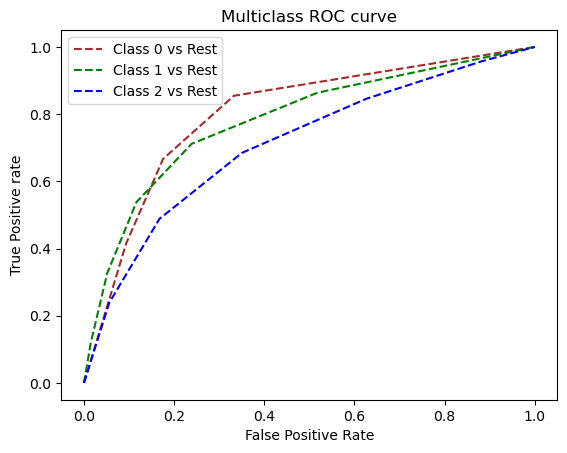

In [62]:
#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'K nearest Neighbours Classification' model with random sampling

from sklearn.neighbors import KNeighborsClassifier

# Create an object for model

CreditKNN= KNeighborsClassifier()

# Train the model with training data

CreditKNN = CreditKNN.fit(x_train,y_train)

# Predict the model with test data set

y_pred = CreditKNN.predict(x_test)
y_pred_prob = CreditKNN.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
#plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
#plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
#plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
#plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
#plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
#plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
new_row = {'Model Name' : CreditKNN,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',average='weighted'),
               'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)

[[3956 1218 4543]
 [ 139 4400 2791]
 [1223 3185 8545]]
Print Class: 0
TP=3956, FN=5761, TN=18921, FP=1362
Accuracy: 0.763
Precision: 0.744
Sensitivity: 0.407
F1-Score: 0.526
Specificity: 0.933
Balanced Accuracy: 0.67
MCC: 0.417

Print Class: 1
TP=4400, FN=2930, TN=18267, FP=4403
Accuracy: 0.756
Precision: 0.5
Sensitivity: 0.6
F1-Score: 0.545
Specificity: 0.806
Balanced Accuracy: 0.703
MCC: 0.383

Print Class: 2
TP=8545, FN=4408, TN=9713, FP=7334
Accuracy: 0.609
Precision: 0.538
Sensitivity: 0.66
F1-Score: 0.593
Specificity: 0.57
Balanced Accuracy: 0.615
MCC: 0.228

Overall Performance Prediction:
Accuracy: 70.9333%
Precision: 59.4%
Recall or Sensitivity: 55.5667%
F1-Score: 0.5547
Specificity or True Nagative Rate: 76.9667%
Balanced Accuracy: 66.2667%

MCC: 0.3427

roc_auc_score: 0.737


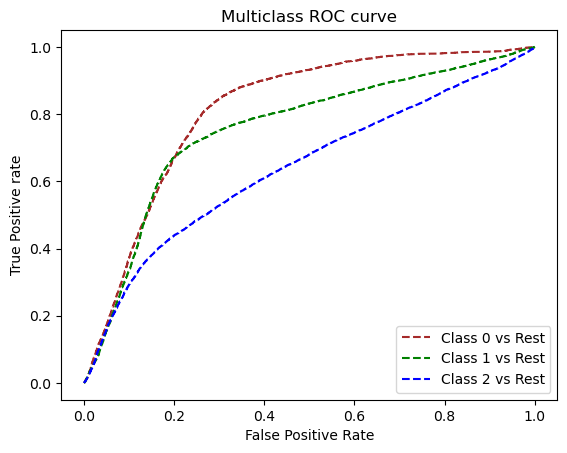

In [63]:


#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Gaussian Bayes Classification' model with random sampling

from sklearn.naive_bayes import GaussianNB

# Create an object for model

CreditGNB =GaussianNB()

# Train the model with training data

CreditGNB = CreditGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = CreditGNB.predict(x_test)
y_pred_prob = CreditGNB.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
#plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
#plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
#plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
#plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
#plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
#plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
new_row = {'Model Name' : CreditGNB,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',average='weighted'),
               'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)

In [64]:
# Display the models [Multinomial Logistic Regression , D]

EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"LogisticRegression(multi_class='multinomial', ...",12554,8272,3325,5849,0.613,0.791,0.603,0.684,0.638,0.222,0.759182,0.620
1,DecisionTreeClassifier(),11046,4772,4833,9349,0.680,0.696,0.698,0.697,0.659,0.358,0.717280,0.678
2,"(ExtraTreeClassifier(random_state=1550290352),...",12067,3764,3812,10357,0.747,0.760,0.762,0.761,0.731,0.493,0.867509,0.746
3,"(DecisionTreeClassifier(max_features='auto', r...",12567,3436,3312,10685,0.775,0.791,0.785,0.788,0.763,0.548,0.891837,0.774
4,KNeighborsClassifier(),10877,4953,5002,9168,0.668,0.685,0.687,0.686,0.647,0.334,0.763212,0.667
5,GaussianNB(),8545,4408,7334,9713,0.609,0.538,0.660,0.593,0.570,0.228,0.737160,0.615


In [65]:
credit_validation

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2022.0,1,809.98,35.030402,1,49.574949,236.64268203272135,6,186.26670208571772
1,24,19114.12,1824.843333,3,4,3,4,3,9,13.27,4.0,1,809.98,33.053114,1,49.574949,21.465380264657146,2,361.44400385378196
2,24,19114.12,1824.843333,3,4,3,4,-1,4,12.27,4.0,1,809.98,33.811894,1,49.574949,148.23393788500925,5,264.67544623342997
3,24,19114.12,1315.560833,3,4,3,4,4,5,11.27,4.0,1,809.98,32.430559,1,49.574949,39.08251089460281,2,343.82687322383634
4,28,34847.84,3037.986667,2,4,6,1,3,1,5.42,5.0,1,605.03,25.926822,1,18.816215,39.684018417945296,1,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4975,20002.88,1929.906667,10,8,29,5,33,25,18.31,12.0,3,3571.7,34.780553,2,60.964772,146.48632477751087,6,275.53956951573343
49996,25,39628.99,1315.560833,4,6,7,2,20,19,11.5,7.0,1,502.38,27.758522,0,35.104023,181.44299902757518,6,409.39456169535066
49997,25,39628.99,3359.415833,4,6,7,2,23,5,13.5,7.0,1,502.38,36.858542,1,35.104023,10000,4,349.7263321025098
49998,25,39628.99,1315.560833,4,6,7,2,21,6,11.5,7.0,1,502.38,39.139840,1,35.104023,97.59857973344877,3,463.23898098947717


# Random Forest Model

In [66]:
# prediction the model with the test dataset

y_pred1=CreditRF.predict(credit_validation)

y_pred1=pd.DataFrame(y_pred1)

In [67]:
# Results1 = pd.DataFrame({'Cresit_Score_A':y_test, 'Credit_Score_P':y_pred1})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = credit_validation.merge(y_pred1, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,0
49284,25,123915.99,10336.332500,3,6,8,2,2,0,8.37,8.0,1,1394.91,29.475268,1,156.988147,89.53407642301649,1,1027.1110262471516,2
41013,38,20592.97,1843.080833,6,4,12,7,7,19,19.78,5.0,2,1555.94,29.431706,2,85.283579,71.08737347751955,4,297.93713105471545,2
44349,50,43138.55,3671.879167,3,7,2,-100,17,3,8.99,0.0,3,553.12,37.759398,1,27.086172,349.4991694444082,6,280.6025750584137,2
1123,33,15713.83,1313.485833,7,8,23,2,48,11,12.39,7.0,2,2271.53,33.903485,2,20.308809,84.57759792580006,4,296.46217619475516,2
46814,56,35681.42,1315.560833,4,4,6,2,11,10,8.32,2.0,2,133.3,29.671013,1,53.778692,123.71856657790087,2,364.3479084503834,2


In [68]:
ResultsFinal.rename(columns = {0:'Credit_Score'}, inplace = True)

In [69]:
ResultsFinal

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2022.0,1,809.98,35.030402,1,49.574949,236.64268203272135,6,186.26670208571772,2
1,24,19114.12,1824.843333,3,4,3,4,3,9,13.27,4.0,1,809.98,33.053114,1,49.574949,21.465380264657146,2,361.44400385378196,2
2,24,19114.12,1824.843333,3,4,3,4,-1,4,12.27,4.0,1,809.98,33.811894,1,49.574949,148.23393788500925,5,264.67544623342997,2
3,24,19114.12,1315.560833,3,4,3,4,4,5,11.27,4.0,1,809.98,32.430559,1,49.574949,39.08251089460281,2,343.82687322383634,2
4,28,34847.84,3037.986667,2,4,6,1,3,1,5.42,5.0,1,605.03,25.926822,1,18.816215,39.684018417945296,1,485.2984336755923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4975,20002.88,1929.906667,10,8,29,5,33,25,18.31,12.0,3,3571.7,34.780553,2,60.964772,146.48632477751087,6,275.53956951573343,2
49996,25,39628.99,1315.560833,4,6,7,2,20,19,11.5,7.0,1,502.38,27.758522,0,35.104023,181.44299902757518,6,409.39456169535066,2
49997,25,39628.99,3359.415833,4,6,7,2,23,5,13.5,7.0,1,502.38,36.858542,1,35.104023,10000,4,349.7263321025098,2
49998,25,39628.99,1315.560833,4,6,7,2,21,6,11.5,7.0,1,502.38,39.139840,1,35.104023,97.59857973344877,3,463.23898098947717,2


In [70]:
ResultsFinal['Credit_Score'].value_counts()

2    44461
1     5538
0        1
Name: Credit_Score, dtype: int64